### **Exploratory Data Analysis (EDA)**

In [2]:
# Importing essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Note: Ensure `processed_data.csv` is in the same directory as this notebook before running the code.*

In [3]:
# Loading the preprocessed dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv('processed_data.csv') 

# Display the first five rows of the dataset 
df.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,Dependents,SurveyLength,SurveyEase,Employed full-time,Employed part-time,ConvertedComp_Normalized,ConvertedComp_Log,CompFreq_Num,Annual_Compensation,Experience_Level
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,No,Appropriate in length,Easy,1,0,0.030500,-3.489996,1,61000.0,Entry
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,No,Appropriate in length,Neither easy nor difficult,1,0,0.047589,-3.045122,1,95179.0,Mid
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Yes,Appropriate in length,Easy,1,0,0.045000,-3.101071,1,90000.0,Senior
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,No,Appropriate in length,Neither easy nor difficult,1,0,0.227676,-1.479827,12,868293.0,Mid
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,No,Appropriate in length,Easy,1,0,0.032639,-3.422232,1,65277.0,Entry


####  Determining Data Distributions

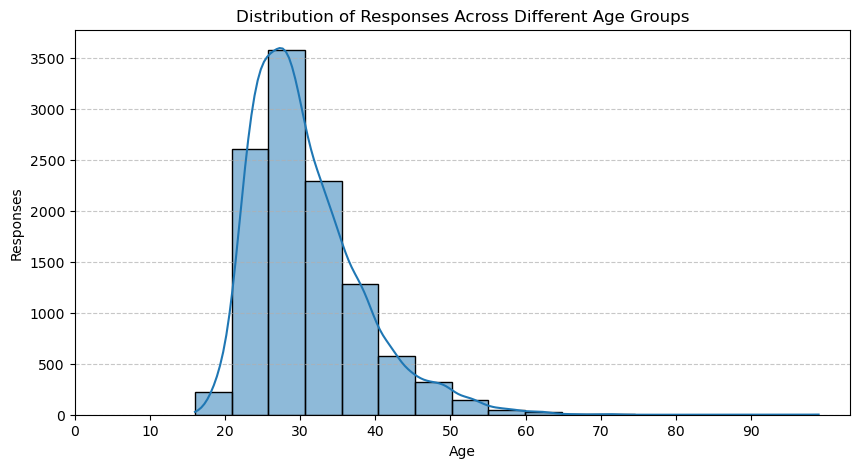

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], binwidth=5, kde=True)
plt.xlabel('Age')
plt.ylabel('Responses')
plt.title('Distribution of Responses Across Different Age Groups')
plt.xticks(np.arange(0, 100, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

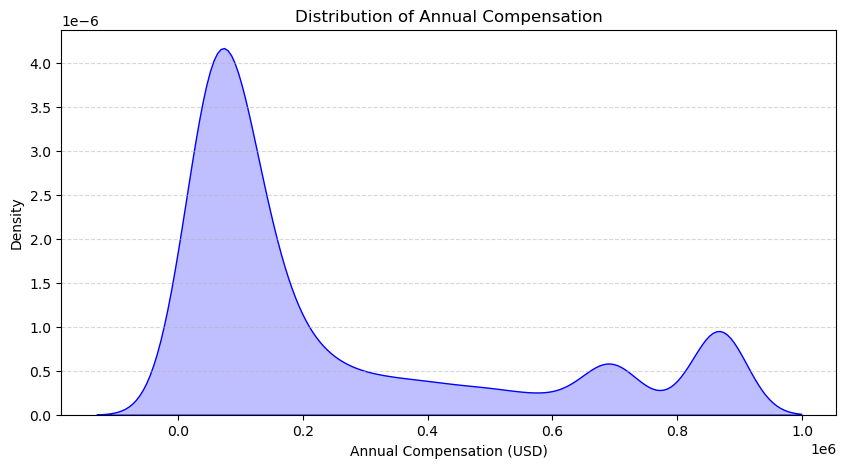

In [5]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Annual_Compensation'], fill=True, color='blue')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.5)

#### Finding Correlations

In [6]:
df.corr(numeric_only=True).iloc[:7, :7] 

,Respondent,YearsCodePro,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.004536,-0.013490,0.002468,-0.015314,0.004621,0.004041
YearsCodePro,-0.004536,1.000000,0.011358,0.088010,0.032160,-0.010294,0.832321
CompTotal,-0.013490,0.011358,1.000000,0.001031,0.003510,0.007063,0.006970
ConvertedComp,0.002468,0.088010,0.001031,1.000000,0.020489,-0.034760,0.103232
WorkWeekHrs,-0.015314,0.032160,0.003510,0.020489,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,-0.010294,0.007063,-0.034760,0.026517,1.000000,-0.020469
Age,0.004041,0.832321,0.006970,0.103232,0.036518,-0.020469,1.000000


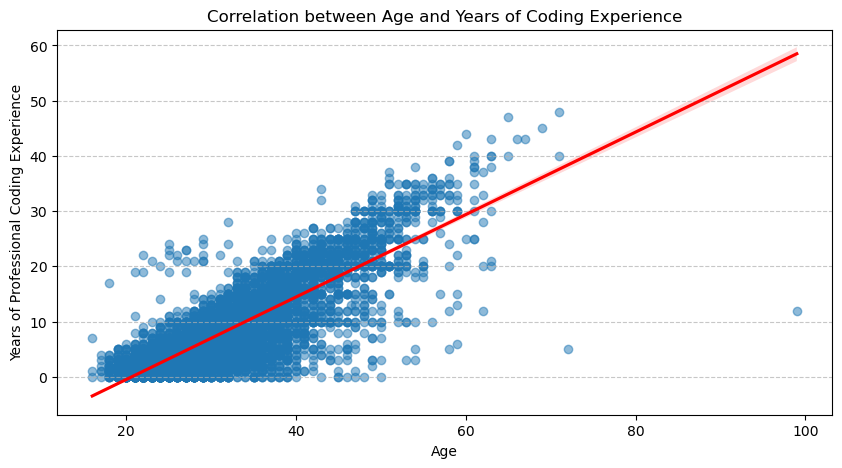

In [7]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='Age', y='YearsCodePro', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Correlation between Age and Years of Coding Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)

The plot shows a strong positive correlation between Age and Years of Coding Experience, indicating that older individuals generally have more experience. However, some outliers suggest late career shifts into coding

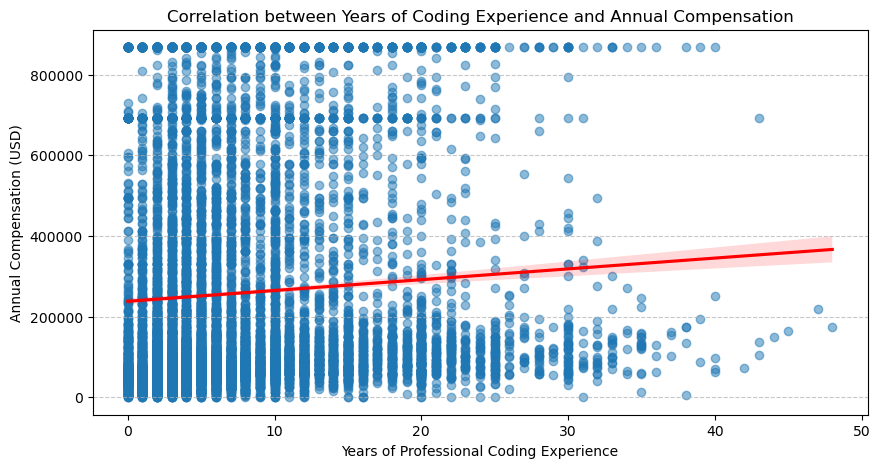

In [8]:
plt.figure(figsize=(10,5))
sns.regplot(x=df['YearsCodePro'], y=df['Annual_Compensation'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Annual Compensation (USD)')
plt.title('Correlation between Years of Coding Experience and Annual Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.7)

The plot shows a weak positive correlation between years of professional coding experience and annual compensation. However, the presence of outliers and a high variance suggests that experience alone does not strongly determine salary

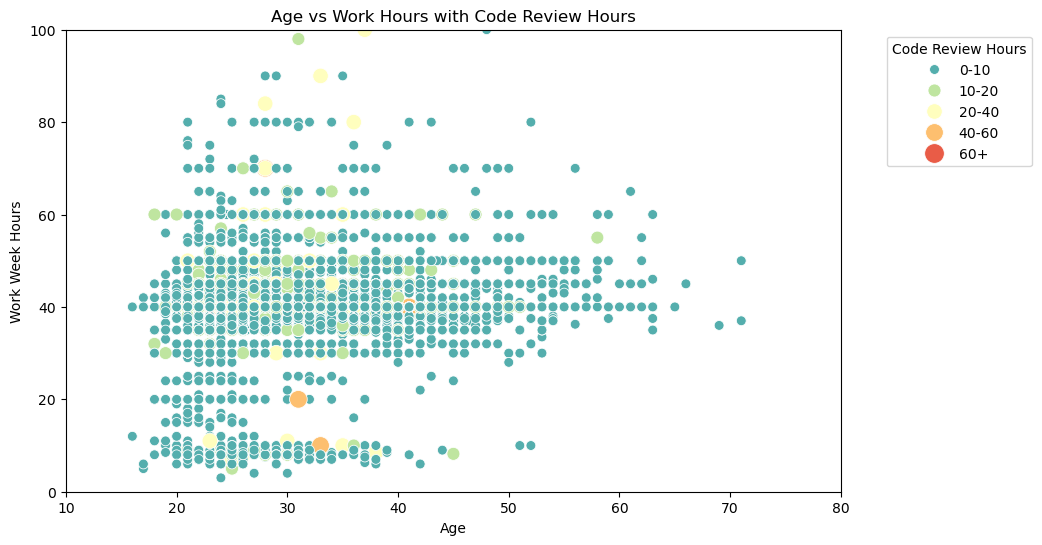

In [17]:
bins = [0, 10, 20, 40, 60, 80]
labels = ['0-10', '10-20', '20-40', '40-60', '60+']
df['CodeRevHrs_Binned'] = pd.cut(df['CodeRevHrs'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='WorkWeekHrs', size='CodeRevHrs_Binned', sizes=(200,50),  hue='CodeRevHrs_Binned', palette='Spectral_r')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Age vs Work Hours with Code Review Hours')
plt.legend(title='Code Review Hours', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(10, 80)  
plt.ylim(0, 100);

The bubble plot illustrates the relationship between Age, Work Week Hours, and Code Review Hours. Most individuals work below 60 hours per week, with higher code review hours clustering in younger age groups.

####  Generating Key Insights

***Which gender provided the most responses?***

In [10]:
print('Total:',len(df['Gender']))
df['Gender'].value_counts()

Total: 11398


Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Out of a total of 11398 responders, **10480** identified as men, making them the majority

***What are the top 5 majority developer types of the survey responders?***

In [11]:
print("Total:",len(df['DevType']))
df['DevType'].value_counts().head()

Total: 11398


DevType
Developer, full-stack                                             1472
Developer, back-end                                                752
Developer, back-end;Developer, front-end;Developer, full-stack     446
Developer, back-end;Developer, full-stack                          405
Developer, front-end                                               292
Name: count, dtype: int64

***What are the key statistical insights from the Annual Compensation distribution?***

In [12]:
# Provides summary statistics for 'Annual_Compensation'
df['Annual_Compensation'].describe()

count     11398.000000
mean     258322.451746
std      280836.587513
min           0.000000
25%       62598.000000
50%      115000.000000
75%      384876.000000
max      868293.000000
Name: Annual_Compensation, dtype: float64

The **average annual compensation** is approximately **\$260,000**, while the **median is \$115,000**, indicating a **right-skewed distribution**.  
A few **respondents have significantly high compensations**, causing deviations in the statistics, though outliers are **capped at \$868,293**.  
The **high standard deviation (~\$280,836)** further highlights substantial variation in salaries across individuals.  


***What is the rank of Python in the list of most popular languages respondents wish to learn next year,?***

In [13]:
df["LanguageDesireNextYear"].value_counts()

LanguageDesireNextYear
C#;HTML/CSS;JavaScript;SQL;TypeScript    116
Python                                   111
C#;HTML/CSS;JavaScript;SQL                93
HTML/CSS;JavaScript;TypeScript            88
HTML/CSS;JavaScript                       73
                                        ... 
Elixir;Erlang;Java;Scala                   1
C;C++;C#;Java;JavaScript;PHP               1
PHP;Python;Ruby;SQL                        1
Bash/Shell/PowerShell;JavaScript;Ruby      1
C++;C#;F#                                  1
Name: count, Length: 6052, dtype: int64

In [14]:
# Split each row by ";" and flatten the list
all_languages = df["LanguageDesireNextYear"].str.split(";").explode()

# Count occurrences of each language in default by descending
language_counts = all_languages.value_counts()

# Returns the top languages
language_counts.head()

LanguageDesireNextYear
JavaScript    6630
HTML/CSS      5328
Python        5239
SQL           5012
TypeScript    4088
Name: count, dtype: int64

**Python** ranks **third** among the most desired programming languages for next year.

***How many respondents indicated that they currently work with 'SQL'?***

In [15]:
lang = df['LanguageWorkedWith'].str.split(';').explode()
len(lang[lang == 'SQL'])

7106

***How many respondents indicated that they work on 'MySQL' only?***

In [16]:
len(df[df['DatabaseWorkedWith'] == 'MySQL'])

474